<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png" width="300"></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Типы функций потерь ($loss$) в задачах машинного обучения</b></h2>

Когда мы обучаем какой-либо алгоритм машинного обучения, мы должны задать как минимум 3 вещи:  

- дать алгоритму **данные**
- выбрать алгоритм **оптимизации**
- выбрать **функцию потерь ($loss$)**

Допустим, что данные уже есть и алгоритм оптимизации выбран. Рассмотрим типы задач машинного обучения и связанные с ними функции потерь.

* Неформальное определение функции потерь:

***Функция потерь*** -- это функция, которая принимает на вход предсказания модели и истинные значения целевого признака, а возвращает неотрицательное число, характеризующее то, насколько хорошо наша модель предсказывает целевой признак. Функция потерь всегда зависит от задачи (точнее -- от типа предсказываемого признака).

* Формальное определение:  

Функция потерь - это функция $L: V \times V \to \mathbb{R}^+$, где множество $V$ зависит от задачи.

Рассмотрим 3 задачи:  
- задача регрессии ($y \in \mathbb{R}$)
- бинарная классификация (на 2 класса)  
- многоклассовая классификация (на $K$ классов)  

**Чем лучше предсказывает модель, тем меньше значеия функции потерь. Чем модель хуже, тем значения функции потерь больше.**

<h3 style="text-align: center;"><b>Задача регрессии</b></h3>

В задачах регрессии выделяют две основные функции потерь:

1). **Квадратичная функция потерь**:  

$$L(\hat{y}, y) = (\hat{y} - y)^2, ~~~~~\hat{y}, y \in \mathbb{R}$$

Если записывать для всей выборки $(X, y)$, где $X$ -- матрица объекты-принаки размера $(n, m)$, а y - столбец истинных ответов размера $(n, 1)$, то:

$$L(\hat{y}, y) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2$$

-- в этом случае её ещё называют **среднеквадратичная ошибка (Mean Squared Error (MSE, MSELoss))**.

2). **Абсолютная функция потерь**:  

$$L(\hat{y}, y) = |\hat{y} - y|, ~~~~~\hat{y}, y \in \mathbb{R}$$

Если записывать для всей выборки $(X, y)$, где $X$ -- матрица объекты-принаки размера $(n, m)$, а y - столбец истинных ответов размера $(n, 1)$, то:

$$L(\hat{y}, y) = \frac{1}{n} \sum_{i=1}^n |\hat{y}_i - y_i|$$

-- в этом случае её ещё называют **средняя абсолютная ошибка (Mean Absolute Error (MAE, MAELoss))**.

<h3 style="text-align: center;"><b>Бинарная классификация</b></h3>

В задачах бинарной классификации иногда тоже используют среднеквадратичную ошибку, однако, например, когда в качестве модели будет выступать *нейрон с сигмоидой (= логистическая регрессия)*, будут некоторые проблемы (см. ноутбук [nn]neuron_logloss.ipynb), поэтому чаще всё-таки используют так называемый $LogLoss$ (или логистическая функция потерь):  

$$L(\hat{y}, y) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}))$$

(тут записано уже сразу по всей выборке).

$LogLoss$ чаще всего используют в случае, когда в качестве $\hat{y}_i$ мы предсказываем вероятность принадлежности к одному из классов, а $y_i \in \{0, 1\}$.

<h3 style="text-align: center;"><b>Многоклассовая классификация</b></h3>

Сначала вспомним, как кодируют целевую переменную в случае многоклассовой классификации.  

Изначально целевой переменной $y$ (классом, который хотим предсказать) может быть и вовсе какая-нибудь строка ('cat', 'dog', 'human'). Такие метки и признаки называют **категориальными**. В этом случае стоит закодировать $y$ просто последовательными неотрицательными числами:  

'cat' $\to$ 0  
'dog' $\to$ 1  
'human' $\to$ 2  

В случае $K$ классов будет $K$ различных числовых значений. Это называется ***LabelEncoding*** (перевод категорий в числовые метки).

Однако заметим, что такое LabelEncoding задаёт на классах **отношение порядка**, то есть мы, например, можем сказать, что 'human' (2) > 'cat' (0) в данном случае. Это неправильно, поскольку это сравнение некорректно и может привести к непредсказуемымому результату.

Поэтому после LabelEncoding'а всегда применяют ***OneHotEncoding***:  

0 $\to$ (1, 0, 0)  
1 $\to$ (0, 1, 0)  
2 $\to$ (0, 0, 1)

То есть преобразуют числовое значение класса в строку размера $(1, K)$, где $K$ -- количество классов (в данном случае их 3, поэтому строка длины 3).

Тогда предобработка категориальной метки  $y$ такая: 
- изначальный **столбец меток $y$ размера $(n, 1)$** переходит в **столбец чисел $y_{LabelEncoded}$ размера $(n, 1)$** 
- столбец $y_{LabelEncoded}$ переходит **в матрицу из 0 и 1 $y_{OneHotEncoded}$ размера $(n, K)$** 

С $\hat{y}$ -- предсказаниями модели -- та же ситуация, только обычно предсказываются сначала вероятности принадлежности к каждому из классов, а потом уже среди них берётся наибольшая и на её месте ставится 1 в строке, а на месте остальных вероятностей ставится 0.

---

*Небольшое отступление про Softmax*: как, имея строку значений $(a_1, a_2, ..., a_K)$, привести все их значения к диапазону $[0, 1]$ так, чтобы в сумме они давали единицу (то есть чтобы можно было интерпретровать значения как вероятности)? Для этого существует (один из способов) функция под названием $Softmax$:  

$$Softmax((a_1, a_2, ..., a_K))_i = \frac{e^{a_i}}{\sum_{j=1}^K e^{a_j}}$$

**Упражение:** убедитесь, что сумма этих значений будет давать в сумме единицу.

То есть строка $(a_1, a_2, ..., a_K)$ переходит в строку:  

$$(a_1, a_2, ..., a_K) \to \left(\frac{e^{a_1}}{\sum_{j=1}^K e^{a_j}}, \frac{e^{a_2}}{\sum_{j=1}^K e^{a_j}}, ..., \frac{e^{a_K}}{\sum_{j=1}^K e^{a_j}}\right)$$

---

В задаче многоклассовой классификации чаще всего пользуются функцией под названиаем $CrossEntropy$ -- кросс-энтропия:  

$$L(\hat{y}, y) = -\frac{1}{n} \sum_{i=1}^n \sum_{j=1}^K y_{ij} \log(\hat{y_{ij}})$$  

где $y$ -- матрица $(n, K)$ истинных значений классов объектов (закодированная OneHot'ом), а $\hat{y}$ -- матрица $(n, K)$ предсказаний модели ($\hat{y}_{ij}$ -- "вероятность" принадлежности $i$-го объекта к $j$-му классу)

<h3 style="text-align: center;"><b>Важно</b></h3>

В данном ноутбуке перечислены далеко не все функции потерь и описаны далеко не все задачи машинного обучения, а лишь 3 конкретных. Более подробно про функции потерь в других задачах и об ML в целом можно больше узнать на курсах, таких, как, например, [курс Воронцова К.В.](https://www.youtube.com/playlist?list=PLJOzdkh8T5kp99tGTEFjH_b9zqEQiiBtC).

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). [Вики-страничка по функциям потерь](http://ru.learnmachinelearning.wikia.com/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_(Loss_function) (информации немного, но зато упомянуты другие функции потерь)

2). Github с очень большим количеством полезных материалов по Machine Learning: https://github.com/demidovakatya/vvedenie-mashinnoe-obuchenie

# Практическая часть (моя версия)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./app-store-apple-data-set-10k-apps/AppleStore.csv')

In [2]:
data.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [3]:
num_cols = [
    'size_bytes', 'price', 'rating_count_tot', 'rating_count_ver',
    'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'cont_rating'
]
cat_cols = ['currency', 'prime_genre']
target_col = ['user_rating']
cols = num_cols + cat_cols + target_col

In [5]:
data = data[cols]
data1 = data['cont_rating'].str.slice(0,-1).astype(int)
data1.head()

0     4
1     4
2     4
3    12
4     4
Name: cont_rating, dtype: int32

In [6]:
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
cont_rating         0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [7]:
for col in cat_cols:
    print(f"{col} distribution")
    print(data[col].value_counts())
    print('\n')

currency distribution
USD    7197
Name: currency, dtype: int64


prime_genre distribution
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64




In [8]:
data = data.drop(columns = ['currency'])
cat_cols.remove('currency')

In [9]:
cat_cols

['prime_genre']

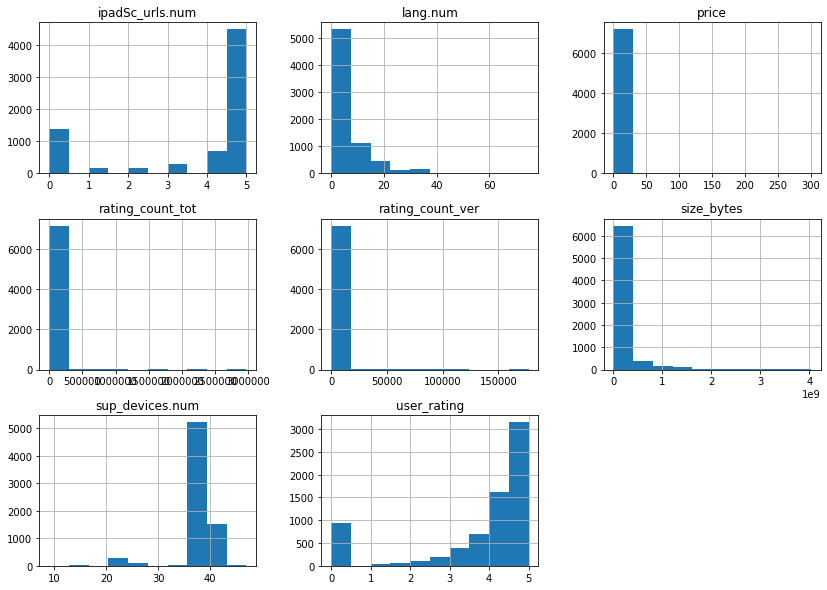

In [10]:
data.hist(column=num_cols + target_col, figsize  =  (14,10))
plt.show()

In [11]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,user_rating
size_bytes,1.00,0.18,0.00,0.01,-0.12,0.15,0.00,0.07
price,0.18,1.00,-0.04,-0.02,-0.12,0.07,-0.01,0.05
rating_count_tot,0.00,-0.04,1.00,0.16,0.01,0.02,0.14,0.08
rating_count_ver,0.01,-0.02,0.16,1.00,0.04,0.02,0.01,0.07
sup_devices.num,-0.12,-0.12,0.01,0.04,1.00,-0.04,-0.04,-0.04
ipadSc_urls.num,0.15,0.07,0.02,0.02,-0.04,1.00,0.09,0.27
lang.num,0.00,-0.01,0.14,0.01,-0.04,0.09,1.00,0.17
user_rating,0.07,0.05,0.08,0.07,-0.04,0.27,0.17,1.00


In [12]:
data.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,user_rating
size_bytes,1.000000,0.182392,0.004486,0.006337,-0.118347,0.152697,0.004614,0.066256
price,0.182392,1.000000,-0.039044,-0.018012,-0.115361,0.066100,-0.006713,0.046601
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.008832,0.015734,0.137675,0.083310
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.037951,0.024333,0.013287,0.068754
sup_devices.num,-0.118347,-0.115361,0.008832,0.037951,1.000000,-0.037728,-0.041681,-0.042451
ipadSc_urls.num,0.152697,0.066100,0.015734,0.024333,-0.037728,1.000000,0.088378,0.265671
lang.num,0.004614,-0.006713,0.137675,0.013287,-0.041681,0.088378,1.000000,0.170976
user_rating,0.066256,0.046601,0.083310,0.068754,-0.042451,0.265671,0.170976,1.000000
